In [1]:
from scipy.stats import linregress
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt





In [2]:
complete_df = pd.read_csv("full_data.csv")
complete_df.info()

complete_df = complete_df.loc[~complete_df.duplicated(subset=['County','State'])]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    2851 non-null   int64  
 1   County                                                                                        2851 non-null   object 
 2   State                                                                                         2851 non-null   object 
 3   Total Population                                                                              2851 non-null   float64
 4   Land Area (m^2)                                                                               2851 non-null   float64
 5   Population Density (per m^2

In [3]:
pop_dense = complete_df['Population Density (per m^2)']
sq_mile = complete_df['Land Area (m^2)']

avg_income = complete_df['Income per capita']
gross_rent = complete_df['Median Gross Rent']

 

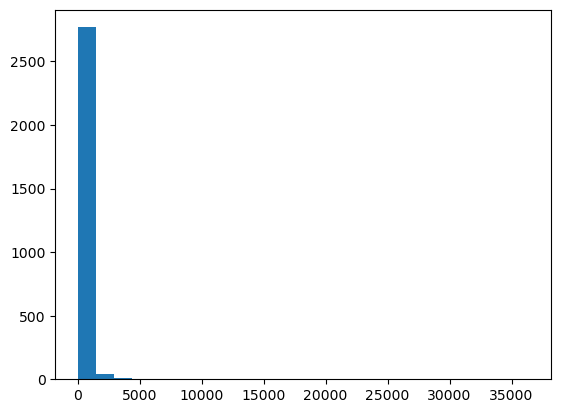

In [4]:
pop_histo = plt.hist(pop_dense, bins = 25)

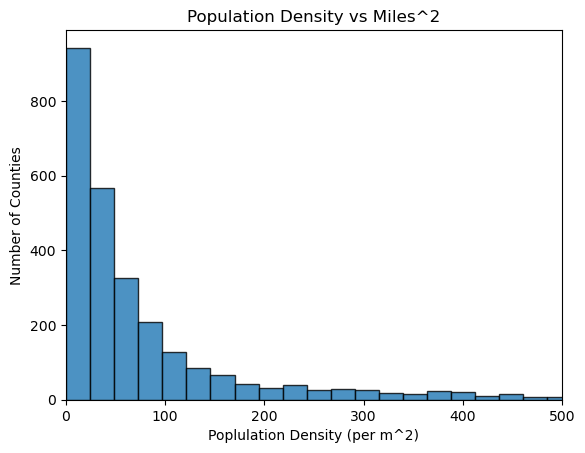

In [6]:
pop_histo = plt.hist(pop_dense, bins = 1500, alpha = .8, edgecolor = 'black')
plt.xlim(0,500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Number of Counties")
plt.title("Population Density vs Miles^2")

plt.savefig('outputs/densityhisto.png')

rvalue: -0.06756208340829314
p-value: 0.00031917832549529254


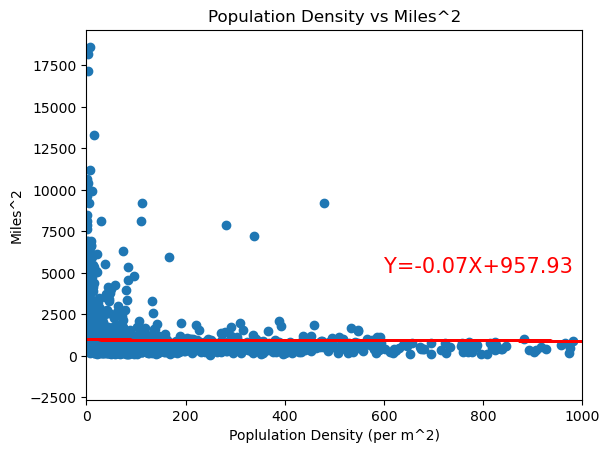

In [7]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,sq_mile)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,1000)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Miles^2")
plt.title("Population Density vs Miles^2")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")
plt.savefig('outputs/linreg_pop_vs_miles.png')

rvalue: 0.18321063739905155
p-value: 8.172353349826106e-23


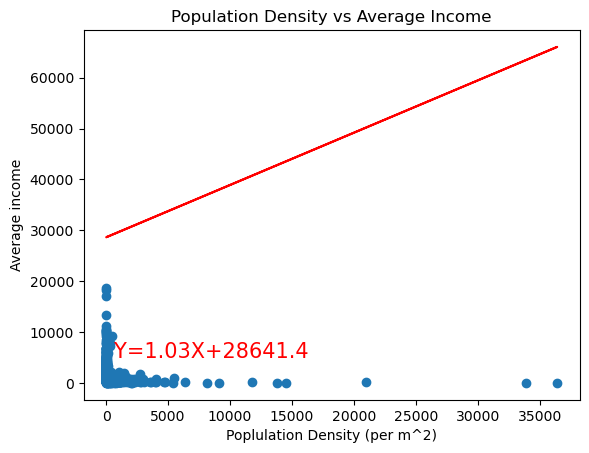

In [8]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,avg_income)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)

plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Average income")
plt.title("Population Density vs Average Income")

print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")

rvalue: 0.31183965553911824
p-value: 5.864022477488506e-65


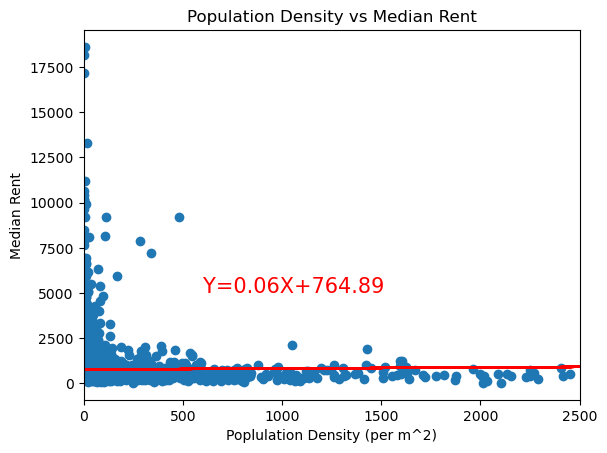

In [9]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,2500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Median Rent")
plt.title("Population Density vs Median Rent")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")


Text(0.5, 1.0, 'Average income vs Median Rent')

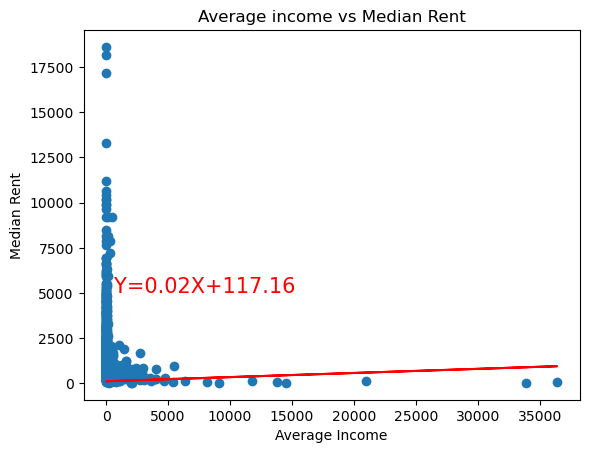

In [97]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_income,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlabel("Average Income")
plt.ylabel("Median Rent")
plt.title("Average income vs Median Rent")